In [122]:
##Importieren der benötigten libraries

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import chi2
import math

In [2]:
#Open Source Daten im csv Format aus der Studie von Awad et al. (2019) importieren
trolley_data = pd.read_csv('Shared_data_responses_demographics.csv')
trolley_data

,UserIP_Anonymized,Scenario,survey.age,survey.gender,survey.education,survey.political,survey.religious,country_code,Outcome,Continent
0,0002ae2d,Footbridge,19,Women,College,0.56,0.00,GB,0,Europe
1,0002ae2d,Loop,19,Women,College,0.56,0.00,GB,1,Europe
2,0002ae2d,Switch,19,Women,College,0.56,0.00,GB,1,Europe
3,00065336,Footbridge,19,Men,College,0.00,0.68,FR,1,Europe
4,00065336,Loop,19,Men,College,0.00,0.68,FR,0,Europe
...,...,...,...,...,...,...,...,...,...,...
59154,ffef6123,Footbridge,27,Men,College,0.34,0.53,SG,0,Asia
59155,ffef6123,Loop,23,Men,College,1.00,0.00,SG,1,Asia
59156,ffef6123,Loop,27,Men,College,0.34,0.53,SG,1,Asia
59157,ffef6123,Switch,23,Men,College,1.00,0.00,SG,1,Asia


In [149]:
##Filtern der Daten nach den relevanten Kriterien
data_DE_Switch = trolley_data.loc[(trolley_data['Scenario'] == 'Switch') & (trolley_data['country_code'] == 'DE')]

In [150]:
##Bereinigung des Datensatzes für einen besseren Überblick
del data_DE_Switch ['UserIP_Anonymized']
del data_DE_Switch ['survey.age']
del data_DE_Switch ['survey.education']
del data_DE_Switch ['survey.political']
del data_DE_Switch ['survey.religious']
del data_DE_Switch ['Continent']

In [151]:
data_DE_Switch

,Scenario,survey.gender,country_code,Outcome
33,Switch,Men,DE,1
96,Switch,Men,DE,1
105,Switch,Men,DE,1
114,Switch,Men,DE,1
120,Switch,Men,DE,1
...,...,...,...,...
58841,Switch,Women,DE,1
58887,Switch,Men,DE,1
58929,Switch,Men,DE,0
59002,Switch,Men,DE,1


Erstellen einer Kontingenztafel mit den relevanten Daten zur Vorbereitung des $\chi^2$-Tests
-------------------------------

In [6]:
Kontingenztafel = pd.crosstab(data_DE_Switch['survey.gender'], data_DE_Switch['Outcome'])
Kontingenztafel

Outcome,0,1
survey.gender,,
Men,226,1232
Women,53,359


Bestimmen der beobachteten Häufigkeiten, der erwarteten Häufigkeiten und des Freiheitsgrades
-------------------------------------

In [7]:
Beobachtete Häufigkeiten = Kontingenztafel.values
print("Beobachtete Häufigkeiten: \n", Beobachtete_Häufigkeiten)

Beobachtete Häufigkeiten: 
 [[ 226 1232]
 [  53  359]]


In [11]:
Werte = stats.chi2_contingency(Kontingenztafel)
print("Erwartete Häufigkeiten: \n", Werte[3])
Erwartete_Häufigkeiten = Werte[3]

Erwartete Häufigkeiten: 
 [[ 217.53048128 1240.46951872]
 [  61.46951872  350.53048128]]


In [12]:
Anzahl_Zeilen=len(Kontingenztafel.iloc[0:2, 0])
Anzahl_Spalten=len(Kontingenztafel.iloc[0, 0:2])
Freiheitsgrad=(Anzahl_Zeilen-1)*(Anzahl_Spalten-1)
print("Freiheitsgrad:", Freiheitsgrad)

Freiheitsgrad: 1


Einfügen der berechneten Werte in die $\chi^2$-Formel
------------------------------------------------------

In [13]:
chi_Quadrat=sum([(b-e)**2./e for b,e in zip(Beobachtete_Häufigkeiten, Erwartete_Häufigkeiten)])
chi_Quadrat_Wert=chi_Quadrat[0]+chi_Quadrat[1]
print("Chi-Quadrat Wert:", chi_Quadrat_Wert)

Chi-Quadrat Wert: 1.7591916738204885


Prüfung der Nullhypothese mittels Abgleich des p-Werts mit dem Signifikanzniveau
-----------------------------------------------------------------------------

**H<sub>0</sub>(Nullhypothese)**: Es besteht kein statistisch relevanter Zusammenhang zwischen Geschlecht und gegebener Antwort <br>
**H<sub>1</sub>(Arbeitshypothese)**: Es besteht ein statistisch relevanter Zusammenhang zwischen Geschlecht und gegebener Antwort

In [14]:
Signifikanzniveau=0.05
P_Wert=1-chi2.cdf(x=chi_Quadrat_Wert, df=Freiheitsgrad)
print("P-Wert:", P_Wert)

P-Wert: 0.1847253709582406


In [152]:
print("Signifikanzniveau:", Signifikanzniveau)
if P_Wert<=Signifikanzniveau:
    print("Das Ergebnis des Chi-Quadrat-Tests lässt nach wissenschaftlichen Standards eine Verwerfung der Nullhypothese zu")
else: print("Das Ergebnis des Chi-Quadrat-Tests lässt nach wissenschaftlichen Standards keine Verwerfung der Nullhypothese zu")

Signifikanzniveau: 0.05
Das Ergebnis des Chi-Quadrat-Tests lässt nach wissenschaftlichen Standards keine Verwerfung der Nullhypothese zu


Berechnung des Phi-Koeffizienten
--------------------------------

In [143]:
Phi=math.sqrt(chi_Quadrat_Wert/(226+1232+53+359))
if Phi >0.2 or Phi <-0.2:
    print("Der Phi-Koeffizient drückt aus, dass ein Zusammenhang zwischen Geschlecht und getroffener Entscheidung besteht")
else:
    print("Der Phi-Koeffizient drückt aus, dass nicht von einem Zusammenhang zwischen Geschlecht und getroffener Entscheidung ausgegangen werden kann")
print("Phi-Koeffizient der Kontingenztafel:", Phi)

Der Phi-Koeffizient drückt aus, dass kein Zusammenhang zwischen Geschlecht und getroffener Entscheidung besteht
Phi-Koeffizient der Kontingenztafel: 0.030671553768910887


Reflektionen bezüglich der angewandten Methodik und des erzielten Ergebnisses
--------------------------------------------------------------------------------------






I. Qualität der Rohdaten
=======================

Die von Awad et al. (2019) verwenden Daten wurden über die "Moral Machine" Website des Massachusetts Institute of Technology erhoben. Eine Selektion der Teilnehmenden seitens der Forscher fand nicht statt. Die anonymisierten, erfassten Daten beinhalten Informationen über:
1. Art des Szenarios: Spezifiziert welche der Szenairen "Switch", "Loop" oder "Footbridge" die/der Teilnehmende durchgespielt hat.
2. Alter des/der Teilnehmenden
3. Geschlecht des/der Teilnehmenden
4. Bildungsgrad des/der Teilnehmenden
5. Politische Ausrichtung des/der Teilnehmenden
6. Religiösität des/der Teilnehmenden
7. Land, von dem aus die Website besucht wurde
8. Getroffene Entscheidung des/der Teilnehmenden (0: nicht eingreifen / 1: eingreifen)
9. Kontinent, von dem aus die Website besucht wurde

Die Open Source Daten im .csv Format umfassen Angaben zu 59159 Teilnehmenden. 

In [19]:
Geschlecht=trolley_data.groupby("survey.gender")
Geschlecht.count()

,UserIP_Anonymized,Scenario,survey.age,survey.education,survey.political,survey.religious,country_code,Outcome,Continent
survey.gender,,,,,,,,,
Men,44166,44166,44166,44166,44166,44166,44166,44166,44166
Women,14993,14993,14993,14993,14993,14993,14993,14993,14993


Bei Betrachtung der Rohdaten kann festgestellt werden, dass Männer im Datensatz um einen Faktor von ca. 2,95 überrepräsentiert sind. In Hinblick auf die Beantwortung der Forschungsfrage könnte sich der bereitgestellte Datensatz somit als ungeeignet für das Erzielen eines aussagekräftigen Ergebnisses herausstellen.

II. Bereinigung und Aufbereitung des Datensatzes
================================

Zur Beantwortung der Forschungsfrage werden nur die Informationen "Geschlecht", "Land" und "Art des Szenarios" benötigt. Um das Projekt möglichst simpel zu halten, beschränkt sich die Untersuchung bezüglich eines signifikanten Zusammenhangs zwischen Geschlecht und getroffener Entscheidung in moralischen Dilemmasituationen auf deutsche Teilnehmende, die das "Switch" Szenario durchgespielt haben. Das Switch Szenario wurde ausgewählt, da es das "klassische Trolleydilemma" darstellt und im Vergleich zu den anderen zwei Szenarien als dasjenige bezeichnet werden kann, bei dem Menschen die unkontroversesten moralischen Intuitionen bilden. Dies wird auch von den erhobenen Daten bestätigt, da eine klare Präferenz für einen Eingriff in das Geschehen ausgemacht werden kann.

In [146]:
Switch=trolley_data.loc[(trolley_data['Scenario'] == 'Switch')]
Entscheidung=Switch.groupby("Outcome")
print(16730/(3221+16730)*100, "Prozent der Teilnehmenden entschieden sich für die Betätigung des Hebels im klassischen Trolley Dilemma")
Entscheidung.count()

83.85544584231367 Prozent der Teilnehmenden entschieden sich für die Betätigung des Hebels im klassischen Trolley Dilemma


,UserIP_Anonymized,Scenario,survey.age,survey.gender,survey.education,survey.political,survey.religious,country_code,Continent
Outcome,,,,,,,,,
0,3221,3221,3221,3221,3221,3221,3221,3221,3221
1,16730,16730,16730,16730,16730,16730,16730,16730,16730


In [147]:
Footbridge=trolley_data.loc[(trolley_data['Scenario'] == 'Footbridge')]
EntscheidungFootbridge=Footbridge.groupby("Outcome")
print(9131/(9131+10413)*100, "Prozent der Teilnehmenden entschieden sich für ein Eingreifen im Footbridge Szenario")
EntscheidungFootbridge.count()

46.72022103970528 Prozent der Teilnehmenden entschieden sich für ein Eingreifen im Footbridge Szenario


,UserIP_Anonymized,Scenario,survey.age,survey.gender,survey.education,survey.political,survey.religious,country_code,Continent
Outcome,,,,,,,,,
0,10413,10413,10413,10413,10413,10413,10413,10413,10413
1,9131,9131,9131,9131,9131,9131,9131,9131,9131


In Hinblick auf die Forschungsfrage wurde der vorliegende Datensatz dementsprechend nach den oben genannten Kriterien gefiltert. Im Anschluss wurde ein neuer Datensatz erstellt, der nur die für das Projekt relevanten Daten beinhaltet. Dieses Vorgehen stellt keine unzulässige Manipulation der Daten dar, da weder Daten abgeändert wurden, noch auf unzulässige Weise Daten hinzugefügt wurden. Aus dem neuen Datensatz wurde eine Kontingenztafel erstellt, welche die auf einen signifikanten Zusammenhang hin zu untersuchenden Variablen Geschlecht und getroffene Entscheidung gegenüberstellt. Auch dieses Vorgehen stellt bloß eine modifizierte Darstellung der ursprünglichen Daten dar und ist als notwendiger Schritt zur Überprüfung der Arbeitshypothese legitim. Nach Umsetzung dieser Schritte verhärtete sich die Vermutung, dass die zur Verfügung stehenden Daten die in der Population beobachtbare Geschlechterverteilung nicht adäquat repräsentieren. Die Forscher schreiben hierzu:
*Globally, the sample shows the expected biases: 75% male [...]* (vgl. Awad et. al. 2019).

In [50]:
Geschlecht_DE=data_DE_Switch.groupby("survey.gender")
print(1458/(1458+412)*100, "Prozent der deutschen Teilnehmenden waren männlich")
Geschlecht_DE.count()

77.96791443850267 Prozent der deutschen Teilnehmenden waren männlich


,Scenario,country_code,Outcome
survey.gender,,,
Men,1458,1458,1458
Women,412,412,412


III. Anwendung des statistischen Tests
--------------------------------------

Aus den Daten ging hervor, dass es nur geringe Unterschiede hinsichtlich der gegebenen Antwort zwischen weiblichen und männlichen deutschen Teilnehmenden gab. Insofern konnte bereits vermutet werden, dass die Arbeitshypothese zu verwerfen ist. Um jedoch ein wissenschaftliches Ergebnis zu erzielen wurde sich dafür entschieden, sich eines gängigen Instruments der Statistik zu bedienen: der $\chi^2$-Test.

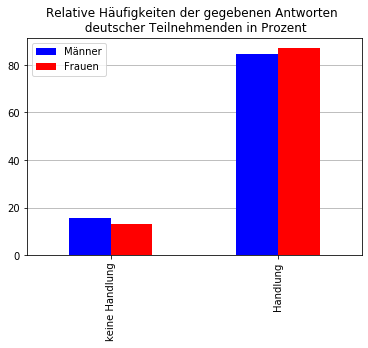

In [110]:
Geschlecht = {'Männer': [226/(226+1232)*100, 1232/(1232+226)*100], 'Frauen': [53/(53+359)*100, 359/(359+53)*100]}
Kontingenztafel_Prozent = pd.DataFrame(Geschlecht, columns=['Männer', 'Frauen'], index=['keine Handlung', 'Handlung'])
Darstellung_Eins=Kontingenztafel_Prozent.plot.bar(color=['blue', 'red'])
plt.legend(loc='upper left')
plt.title('Relative Häufigkeiten der gegebenen Antworten \n deutscher Teilnehmenden in Prozent')
plt.grid(axis='y')
Darstellung_Eins.set_axisbelow('True')

Der $\chi^2$ Test wurde als für das angestrebte Ergebnis geeignetes Instrument bewertet, da die zu untersuchenden Daten nominalskalierte Merkmale darstellen (Geschlecht und Handlungsentscheidung). Der $\chi^2$-Test wurde speziell entworfen, um derartige Daten auf statistisch relevante Unterschiede hin zu überprüfen. Die Quintessenz des Tests ist der Vergleich der vorliegenden Häufigkeiten mit Häufigkeiten, die zu erwarten wären, wenn die Merkmale unabhängig voneinander wären. 

III.I Zu p-Wert und Signifikanzniveau
======================================

Um die Ergebnisse des Projekts angemessen interpretieren zu können und Limitierungen zu verdeutlichen, ist ein kurzer Exkurs in die Statistik von Nöten. Eine Begriffsdefinition bietet Anhaltspunkte für eine Diskussion des Vorgehens:

Der **P-Wert** soll die Wahrscheinlichkeit darstellen, mit der ein beobachteter Unterschied in zwei Versuchsgruppen zufällig entstanden sein könnte.

Das **Signifikanzniveau** wird im Voraus vom Forschenden festeglegt. Es soll die Wahrscheinlichkeit darstellen, mit der die Nullhypothese fälschlicherweise verworfen wird - also ein Fehler 1. Art begangen wird. Anders ausgedrückt: Es ist die Wahrscheinlichkeit, mit der von signifikanten Zusammenhängen ausgegangen wird, obwohl diese nicht bestehen.

Das Arbeiten mit diesen Werten wird immer wieder kontrovers diskutiert. Zunächst kann kritisiert werden, dass eine Hypothese mit dieser Arbeitsweise weder definitiv bestätigt, noch definitiv widerlegt werden kann. Unabhängig von der Repräsentativität der verwendeten Daten kann einzig der Schluss gezogen werden, dass die Nullhypothese nicht verworfen werden kann. Dies bedeutet streng genommen weder, dass die Arbeitshypothese widerlegt wurde, noch, dass die Nullhypothese bewiesen wurde. Derartige Aussagen können Forschende  (mit den Mitteln der Statistik) nicht treffen. Diese Überlegungen führen in den Bereich der Erkenntnistheorie und der Wissenschaftsphilosophie.

III.II Fazit
============

Von der erkenntnistheoretischen Metaebene aus betrachtet fängt das Projekt die Einsicht ein, dass der Mensch sich keiner Erkenntnis hundertprozentig sicher sein kann. Metaphorisch betrachtet können die erhobenen Daten als *phaenomena* betrachtet werden, welche keine Rückschlüsse auf die *nuomena* - den tatsächlichen Sachverhalten - zulassen. Zusammengefasst kann also das mithilfe des $\chi^2$-Tests erzielte Ergebnis folgendermaßen ausgedrückt werden: 
"Der angewandte statistische Test liefert gemäß der wissenschaftlich gängigen Auswertungsnormen keine Ahnhaltspunkte dafür, dass die ausgewerteten Daten die Annahme eines Zusammenhangs zwischen Geschlecht und gegebener Antwort zulassen."